In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
import geopandas as gpd
import contextily as ctx

from importlib import reload
import asp_plot.altimetry
reload(asp_plot.altimetry)

from asp_plot.altimetry import Altimetry

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]
try:
    aligned_dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m*pc_align*.tif"))[0]
except:
    aligned_dem_fn = None


geojson_fn = "/Users/ben/Dropbox/UW_Shean/WV/2022/utqiagvik_wv_2022_sliderule_poly.geojson"

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [3]:
try:
    atl06sr = gpd.read_parquet(os.path.join(icesat_directory, "atl06sr_all.parquet"))
    atl06sr_filtered = gpd.read_parquet(os.path.join(icesat_directory, "atl06sr_filtered.parquet"))

    icesat = Altimetry(
        dem_fn=dem_fn, 
        geojson_fn=geojson_fn,
        aligned_dem_fn=aligned_dem_fn,
        atl06sr=atl06sr,
        atl06sr_filtered=atl06sr_filtered
    )
except:
    print("No existing ATL06 files found. You'll need to re-request")
    icesat = Altimetry(dem_fn=dem_fn, geojson_fn=geojson_fn, aligned_dem_fn=aligned_dem_fn)

No existing ATL06 files found. You'll need to re-request


In [4]:
if icesat.atl06sr is None:
    icesat.pull_atl06sr(
        esa_worldcover=True,
        filename=os.path.join(icesat_directory, "atl06sr_all"),
        parms=None,
    )

icesat.atl06sr


ICESat-2 ATL06 request processing with parms:
{'poly': [{'lon': -156.27875181715967, 'lat': 71.23928395454953}, {'lon': -156.25426170470448, 'lat': 71.41276421658509}, {'lon': -156.9626248894057, 'lat': 71.42170678237126}, {'lon': -156.98080923231944, 'lat': 71.24813787781376}, {'lon': -156.27875181715967, 'lat': 71.23928395454953}], 'samples': {'esa_worldcover': {'asset': 'esa-worldcover-10meter'}}}


,w_surface_window_final,gt,n_fit_photons,h_sigma,cycle,pflags,segment_id,h_mean,rgt,y_atc,rms_misfit,spot,x_atc,region,dh_fit_dx,geometry,esa_worldcover.time,esa_worldcover.value,esa_worldcover.flags,esa_worldcover.file_id
time,,,,,,,,,,,,,,,,,,,,
2018-10-19 01:22:42.824512512,30.000000,10,16,1.479594,1,0,396530,-2.108124,312,2075.298584,5.876560,6,7947765.5,3,-0.626222,POINT (-156.33706 71.24034),1.309046e+12,30.0,0,738734374912
2018-10-19 01:22:42.827333632,30.000000,10,11,2.920477,1,0,396531,-9.804498,312,2075.292725,7.589827,6,7947785.5,3,-0.502326,POINT (-156.33713 71.24052),1.309046e+12,30.0,0,738734374912
2018-10-19 01:22:42.830150400,29.173544,10,14,1.013944,1,0,396532,3.178604,312,2075.195801,3.736146,6,7947805.5,3,0.402737,POINT (-156.3372 71.2407),1.309046e+12,90.0,0,738734374912
2018-10-19 01:22:42.832967680,52.371086,10,20,3.197021,1,0,396533,-3.672042,312,2075.191895,13.185642,6,7947825.5,3,-2.053628,POINT (-156.33727 71.24087),1.309046e+12,90.0,0,738734374912
2018-10-19 01:22:42.835783168,30.000000,10,69,0.000000,1,2,396534,-18.856215,312,2075.234131,0.000000,6,7947845.5,3,0.434813,POINT (-156.33735 71.24105),1.309046e+12,60.0,0,738734374912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:11.419099392,30.000000,60,29,0.000000,23,2,605230,53.439845,381,-3294.240967,0.000000,1,12123377.0,5,-0.378113,POINT (-156.80477 71.24711),1.309046e+12,30.0,0,236223201280
2024-04-12 14:33:11.421910272,31.691811,60,19,0.000000,23,2,605231,44.182949,381,-3294.243896,0.000000,1,12123397.0,5,1.242585,POINT (-156.80484 71.24693),1.309046e+12,30.0,0,236223201280
2024-04-12 14:33:11.424734976,31.591043,60,17,0.000000,23,2,605232,14.955210,381,-3294.374268,0.000000,1,12123417.0,5,-1.188727,POINT (-156.80491 71.24676),1.309046e+12,30.0,0,236223201280


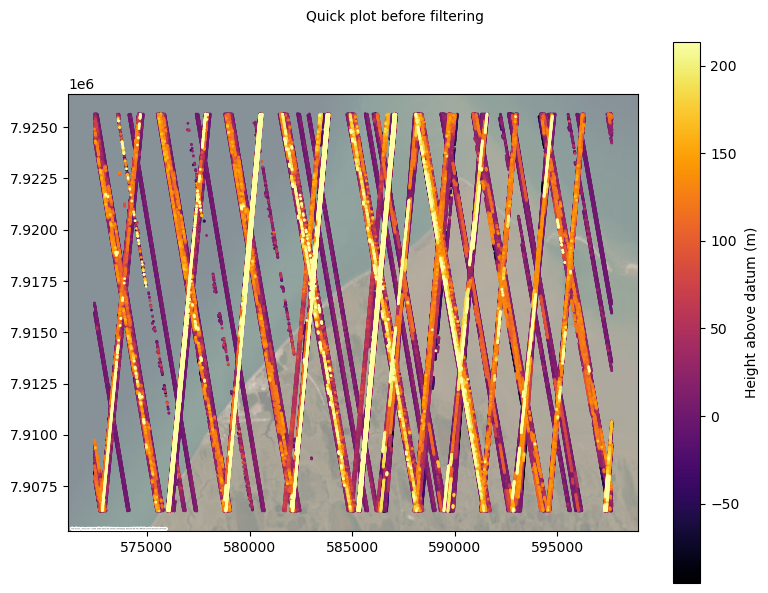

In [5]:
icesat.plot_atl06sr(
    title="Quick plot before filtering",
    map_crs=map_crs,
    **ctx_kwargs
)

In [10]:
# Get only the data that is coincident with the DEM acquisition
if icesat.atl06sr_filtered is None:
    icesat.filter_atl06sr(
        h_sigma_quantile=0.95,
        mask_worldcover_water=True,
        select_months=[4],
        select_years=[2022],
        filename=os.path.join(icesat_directory, "atl06sr_filtered"),
    )

icesat.atl06sr_filtered

,w_surface_window_final,gt,n_fit_photons,h_sigma,cycle,pflags,segment_id,h_mean,rgt,y_atc,rms_misfit,spot,x_atc,region,dh_fit_dx,geometry,esa_worldcover.time,esa_worldcover.value,esa_worldcover.flags,esa_worldcover.file_id
time,,,,,,,,,,,,,,,,,,,,
2022-04-17 01:15:56.210853376,4.797086,10,295,0.063010,15,4,604607,1.579141,381,3311.709229,0.768987,1,12110909.0,5,-0.124473,POINT (-156.57677 71.35026),1.309046e+12,60.0,0,188978561024
2022-04-17 01:15:56.467529728,17.493622,10,172,0.361169,15,0,604698,7.360164,381,3309.845215,3.029019,1,12112730.0,5,-0.550595,POINT (-156.5835 71.33408),1.309046e+12,90.0,0,188978561024
2022-04-17 01:15:56.470366720,8.197321,10,209,0.154096,15,4,604699,1.262775,381,3309.833984,1.263511,1,12112750.0,5,0.126525,POINT (-156.58357 71.3339),1.309046e+12,90.0,0,188978561024
2022-04-17 01:15:56.473206272,5.334358,10,12,0.580667,15,4,604700,14.452252,381,3309.765381,1.987427,1,12112770.0,5,-0.207811,POINT (-156.58365 71.33372),1.309046e+12,90.0,0,188978561024
2022-04-17 01:15:56.478862080,13.786940,10,139,0.336616,15,0,604702,8.354430,381,3309.667480,2.428385,1,12112810.0,5,0.540132,POINT (-156.5838 71.33337),1.309046e+12,90.0,0,188978561024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17 01:15:57.948431872,30.273314,60,72,0.736336,15,0,605112,32.296021,381,-3314.016846,6.094207,6,12121015.0,5,1.186947,POINT (-156.79692 71.26812),1.309046e+12,30.0,0,188978561024
2022-04-17 01:15:57.954062336,27.024799,60,27,0.514837,15,0,605114,28.592796,381,-3313.941162,2.627630,6,12121055.0,5,0.332882,POINT (-156.79706 71.26777),1.309046e+12,30.0,0,188978561024
2022-04-17 01:15:57.959682048,20.123384,60,18,0.383337,15,0,605116,26.792586,381,-3313.871826,1.621593,6,12121096.0,5,0.318711,POINT (-156.7972 71.26741),1.309046e+12,30.0,0,188978561024


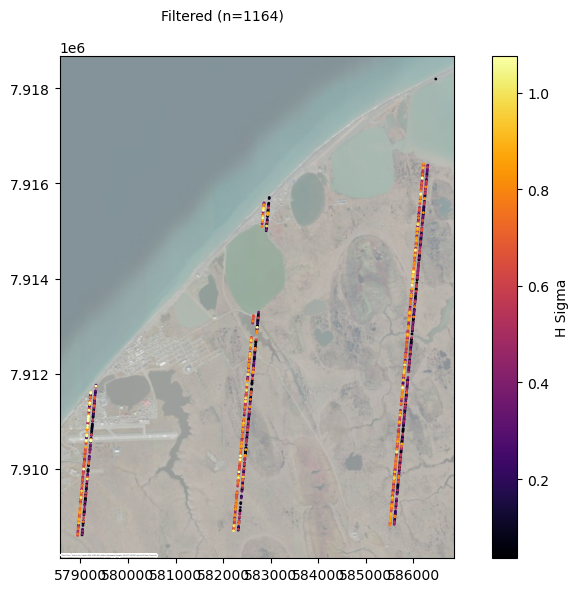

In [7]:
icesat.plot_atl06sr(
    title=f"Filtered (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    map_crs=map_crs,
    column_name="h_sigma",
    cbar_label="H Sigma",
    **ctx_kwargs
)

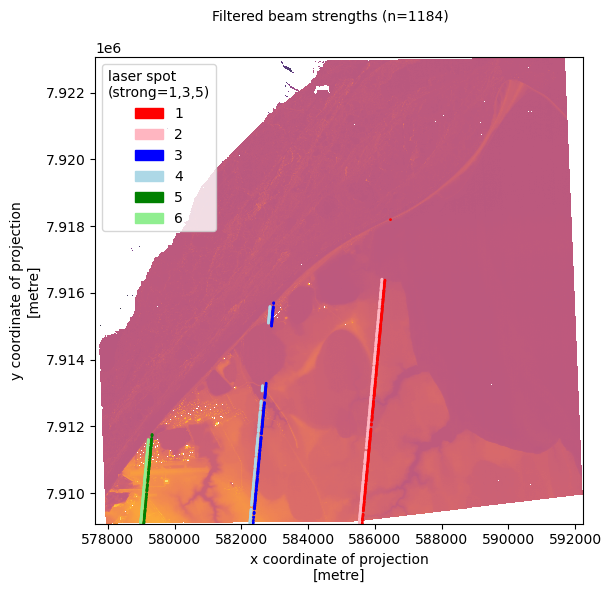

In [49]:
icesat.plot_atl06sr(
    title=f"Filtered beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    plot_beams=True,
    use_dem_basemap=True,
    map_crs=map_crs,
    **ctx_kwargs
)


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



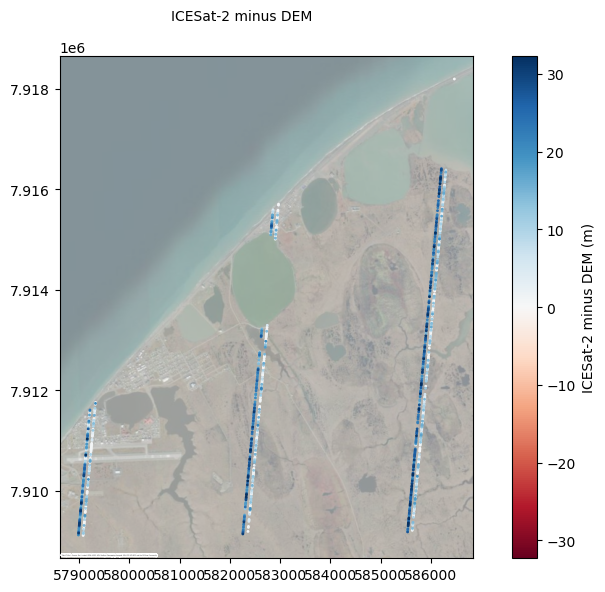

In [50]:
icesat.compare_atl06sr_to_dem(
    title="ICESat-2 minus DEM",
    **ctx_kwargs
)

In [51]:
# Previous mismatch indicates need for pc_align step
icesat.pc_align_dem_to_atl06sr(
    atl06sr_csv=os.path.join(icesat_directory, "atl06sr_filtered.csv"),
    output_prefix=os.path.join(directory, "pc_align/pc_align"),
)

--> Setting number of processing threads to: 4

Creating output directory: "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align".
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align-log-pc_align-08-01-2248-4476.txt
Will use datum (for CSV files): Geodetic Datum --> Name: WGS_1984  Spheroid: WGS 84  Semi-major axis: 6378137  Semi-minor axis: 6356752.3142451793  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=WGS84 +no_defs
Computing the bounding boxes of the reference and source points using 9000000 sample points.
Computation of bounding boxes took 13.137 [s]
Reference points box: Origin: (-156.826, 71.2694) width: 0.401829 height: 0.124855
Source points box:    Origin: (-156.798, 71.2663) width: 0.22219 height: 0.0842259
Intersection reference box:  Origin: (-156.798, 71.2694) width: 0.22219 height: 0.0811688
Intersection source    box:  Origin: (-156.798, 71.2694) 

In [55]:
icesat.generate_translated_dem(
    pc_align_output=os.path.join(directory, "pc_align/pc_align-trans_reference.tif"),
    dem_out_fn=dem_fn.replace(".tif", "_pc_align_translated"),
)

--> Setting number of processing threads to: 4
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated-log-point2dem-08-01-2254-17865.txt
The point cloud files must have an equal number of channels which must be 4 or 6 to be able to remove outliers.

Point cloud extent estimation: [..........................................] 0%
Point cloud extent estimation: [..........................................] 1%
Point cloud extent estimation: [..........................................] 2%
Point cloud extent estimation: [*.........................................] 3%
Point cloud extent estimation: [*.........................................] 4%
Point cloud extent estimation: [**........................................] 5%
Point cloud extent estimation: [**........

In [58]:
icesat.aligned_dem_fn = dem_fn.replace(".tif", "_pc_align_translated-DEM.tif")


Using aligned DEM for comparison.


Using aligned DEM for comparison.



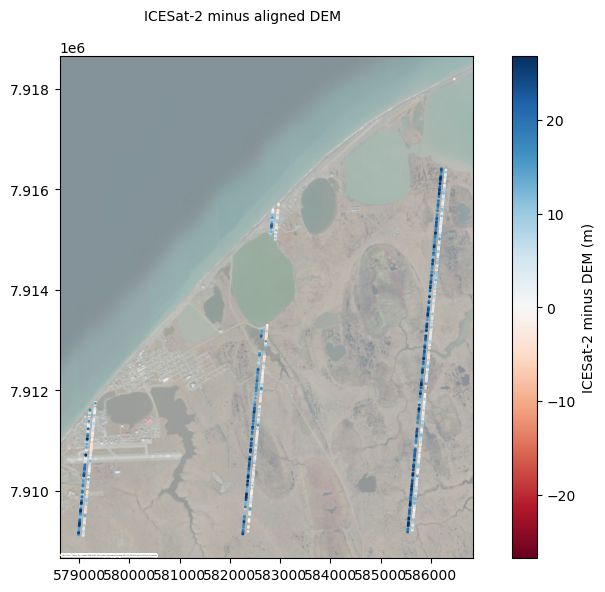

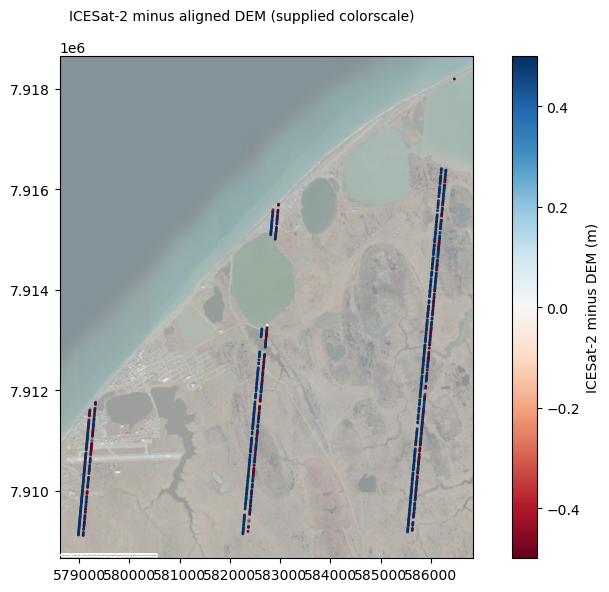

In [59]:
# Quickly compare the translated DEM to the ATL06 data
icesat.compare_atl06sr_to_dem(title = "ICESat-2 minus aligned DEM", use_aligned_dem=True, **ctx_kwargs)

icesat.compare_atl06sr_to_dem(title = "ICESat-2 minus aligned DEM (supplied colorscale)", clim=(-0.5, 0.5), use_aligned_dem=True, **ctx_kwargs)

In [61]:
# Gather a larger subset of data for validation
icesat.filter_atl06sr(
    h_sigma_quantile=0.95,
    mask_worldcover_water=False,
    select_months=[3, 4, 5],
    save_to_csv=False,
    save_to_gpkg=False,
    file_to_save=os.path.join(icesat_directory, "atl06sr_filtered_noWaterMask_MarchAprilMay_allTime_for_validation"),
)

,n_fit_photons,spot,x_atc,y_atc,w_surface_window_final,dh_fit_dx,pflags,cycle,rms_misfit,segment_id,h_sigma,rgt,gt,region,h_mean,esa_worldcover.file_id,esa_worldcover.flags,esa_worldcover.value,esa_worldcover.time,geometry
time,,,,,,,,,,,,,,,,,,,,
2019-04-18 16:42:25.758,736,3,7951087.5,4860.481445,5.799953e+20,-0.209321,0,3,86.361397,396696,3.190147,312,30,3,-1.992327,184683593728,0,80.0,1.309046e+12,POINT (-156.4261 71.2666)
2019-04-18 16:42:25.761,750,3,7951107.5,4860.437012,1.031103e+21,0.211128,0,3,84.909294,396697,3.105118,312,30,3,-2.542358,184683593728,0,80.0,1.309046e+12,POINT (-156.42618 71.26678)
2019-04-18 16:42:25.764,733,3,7951127.5,4860.357910,5.799953e+20,-0.316492,0,3,79.875534,396698,2.950737,312,30,3,-0.940236,184683593728,0,80.0,1.309046e+12,POINT (-156.42625 71.26696)
2019-04-18 16:42:25.767,730,3,7951147.5,4860.274414,1.031103e+21,0.030006,0,3,79.317123,396699,2.936219,312,30,3,0.417156,184683593728,0,80.0,1.309046e+12,POINT (-156.42632 71.26713)
2019-04-18 16:42:25.769,760,3,7951167.5,4860.208496,1.031103e+21,-0.210451,0,3,84.042885,396700,3.049138,312,30,3,0.106438,184683593728,0,90.0,1.309046e+12,POINT (-156.42639 71.26731)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:08.668,71,4,12106206.0,52.733665,1.031103e+21,-1.398296,0,23,51.961163,604372,7.032969,381,30,5,-1.576862,227633266688,0,80.0,1.309046e+12,POINT (-156.65017 71.39586)
2024-04-12 14:33:09.709,71,3,12111129.0,-34.619816,1.031103e+21,0.192848,0,23,62.546719,604618,7.448154,381,40,5,1.662242,227633266688,0,80.0,1.309046e+12,POINT (-156.67049 71.35221)
2024-04-12 14:33:10.657,10,2,12120435.0,-3207.792725,5.091055e+01,-1.996348,0,23,10.070227,605083,3.213951,381,50,5,-25.488793,227633266688,0,30.0,1.309046e+12,POINT (-156.79191 71.27316)



Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



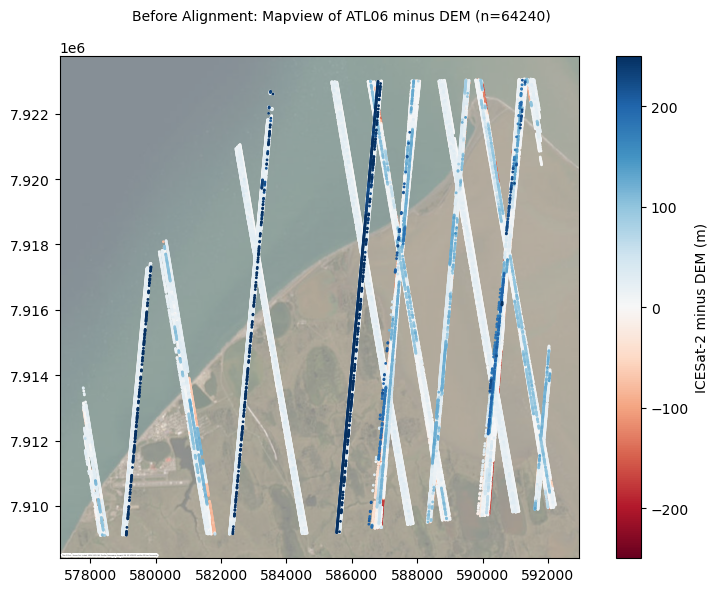

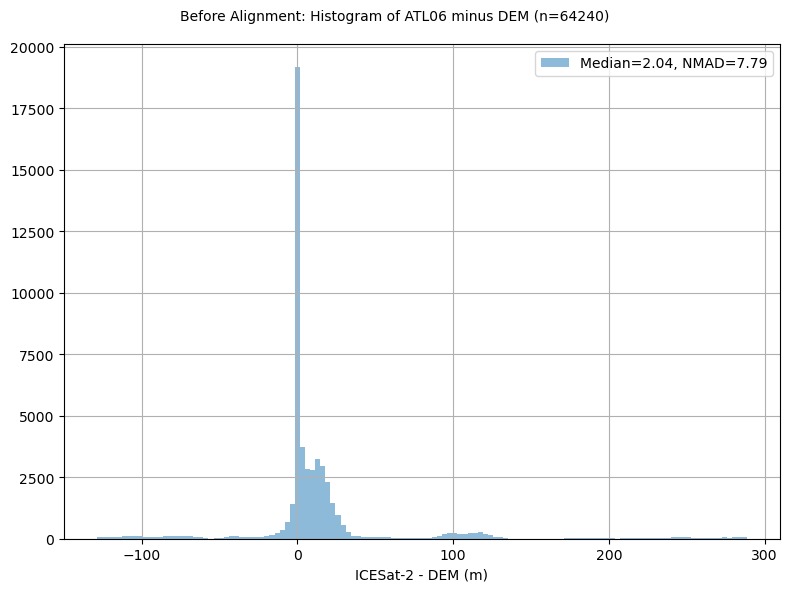

In [62]:
# Validate (before)
icesat.compare_atl06sr_to_dem(title=f"Before Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})", **ctx_kwargs)
icesat.histogram(title=f"Before Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})")


Using aligned DEM for comparison.



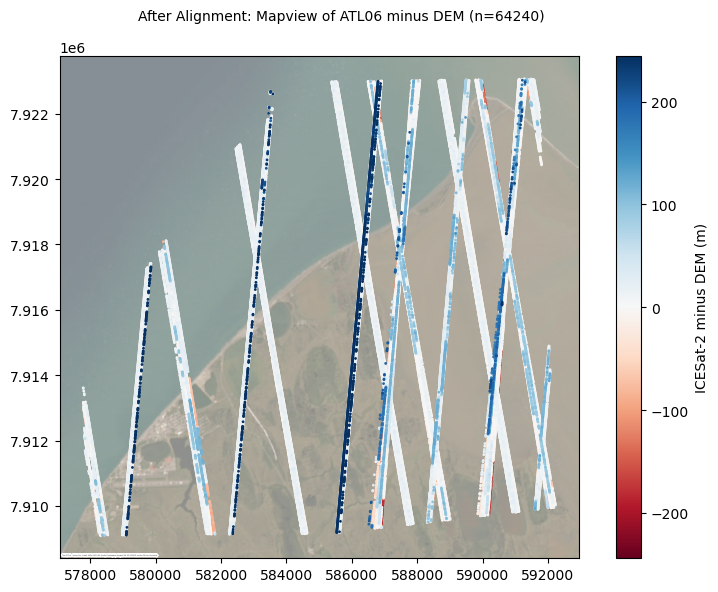

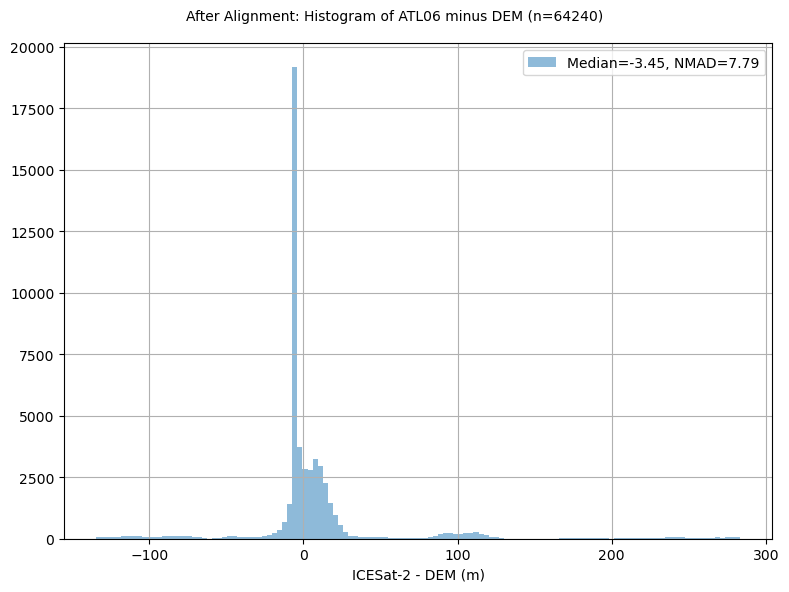

In [63]:
# Validate (after)
icesat.compare_atl06sr_to_dem(title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})", use_aligned_dem=True, **ctx_kwargs)
icesat.histogram(title=f"After Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})")


Using aligned DEM for comparison.



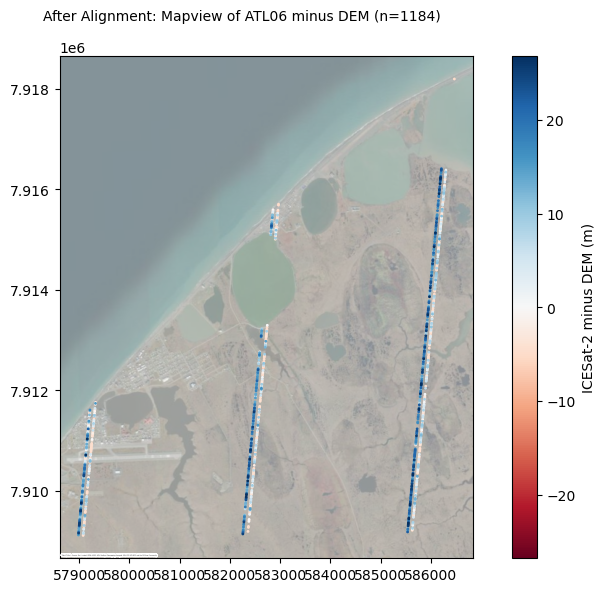

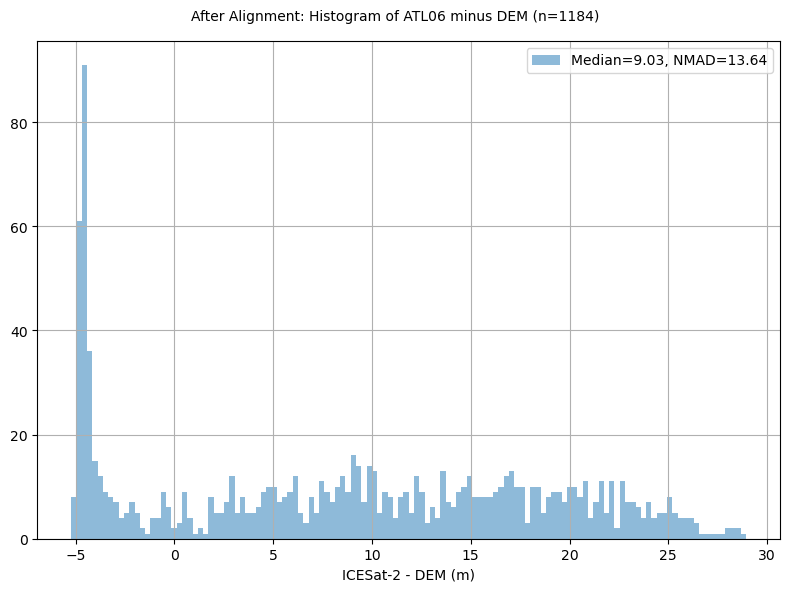

In [64]:
# Collect only the coincident filtereded data again for profile plotting
icesat.filter_atl06sr(
    h_sigma_quantile=0.95,
    mask_worldcover_water=True,
    select_months=[4],
    select_years=[2022],
)

icesat.compare_atl06sr_to_dem(title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})", use_aligned_dem=True, **ctx_kwargs)

icesat.histogram(title=f"After Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})")

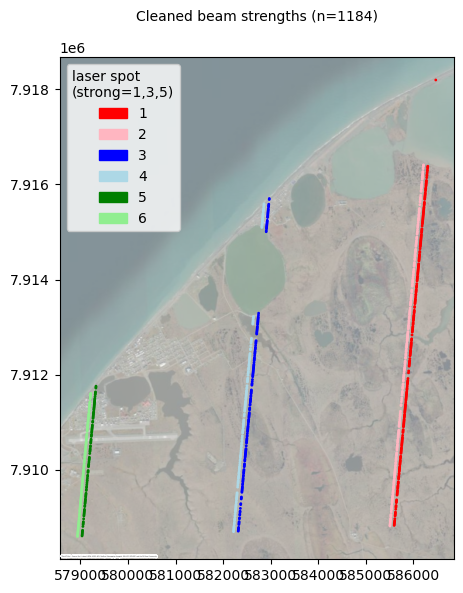

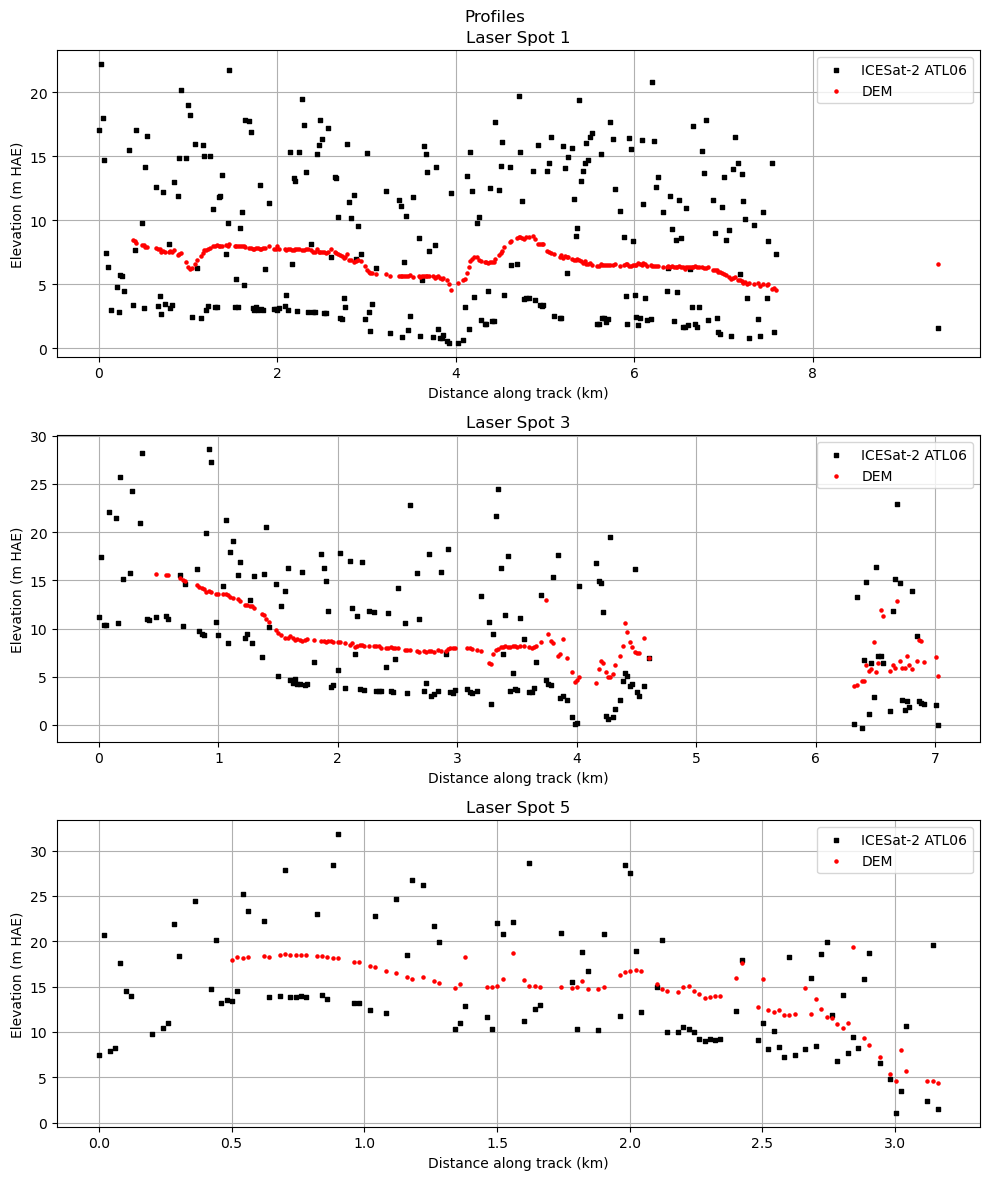

In [65]:
icesat.plot_atl06sr(
    title=f"Cleaned beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    plot_beams=True,
    use_dem_basemap=False,
    map_crs=map_crs,
    **ctx_kwargs
)

icesat.plot_atl06sr_dem_profiles(title="Profiles", only_strong_beams=True)